In [136]:
import pybaseball 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

year = 2023

teams = {
    'ARI': 'Diamondbacks', 'ATL': 'Braves', 'BAL': 'Orioles', 'BOS': 'RedSox', 'CHC': 'Cubs',
    'CHW': 'WhiteSox', 'CIN': 'Reds', 'CLE': 'Guardians', 'COL': 'Rockies', 'DET': 'Tigers', 
    'HOU': 'Astros', 'KCR': 'Royals', 'LAA': 'Angels', 'LAD': 'Dodgers', 'MIA': 'Marlins',
    'MIL': 'Brewers', 'MIN': 'Twins', 'NYM': 'Mets', 'NYY': 'Yankees', 'OAK': 'Athletics',
    'PHI': 'Phillies', 'PIT': 'Pirates', 'SDP': 'Padres', 'SFG': 'Giants', 'SEA': 'Mariners',
    'STL': 'Cardinals', 'TBR': 'Rays', 'TEX': 'Rangers', 'TOR': 'BlueJays', 'WSN': 'Nationals'
}

team_data = {}

for abbrev, team_name in teams.items():
    data = pybaseball.schedule_and_record(year, abbrev)
    team_data[team_name] = data

http://www.baseball-reference.com/teams/ARI/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/ATL/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/BAL/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/BOS/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/CHC/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/CHW/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/CIN/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/CLE/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/COL/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/DET/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/HOU/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/KCR/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/LAA/2023-schedule-scores.shtml
http://www.baseball-reference.com/teams/LAD/2023-schedule-scores.shtml
http:/

In [137]:
team_data['RedSox']

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Thursday, Mar 30",BOS,Home,BAL,L,9.0,10.0,9.0,0-1,5.0,1.0,Gibson,Kluber,Bautista,3:10,D,36049.0,.98,-1,None
2,"Saturday, Apr 1",BOS,Home,BAL,W-wo,9.0,8.0,9.0,1-1,2.0,1.0,Jansen,Bautista,None,3:04,D,29062.0,.92,1,None
3,"Sunday, Apr 2",BOS,Home,BAL,W,9.0,5.0,9.0,2-1,2.0,1.0,Houck,Irvin,None,2:44,D,27886.0,.97,2,None
4,"Monday, Apr 3",BOS,Home,PIT,L,6.0,7.0,9.0,2-2,3.0,2.0,Underwood,Crawford,Bednar,2:57,N,28369.0,.92,-1,None
5,"Tuesday, Apr 4",BOS,Home,PIT,L,1.0,4.0,9.0,2-3,4.0,3.0,Contreras,Pivetta,Bednar,2:36,N,28842.0,.84,-2,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,"Wednesday, Sep 27",BOS,Home,TBR,L,0.0,5.0,9.0,76-82,5.0,23.0,Glasnow,Bello,None,2:26,N,34559.0,.00,-4,None
159,"Thursday, Sep 28",BOS,@,BAL,L,0.0,2.0,9.0,76-83,5.0,24.0,Kremer,Sale,Wells,2:30,N,27543.0,.00,-5,None
160,"Friday, Sep 29",BOS,@,BAL,W,3.0,0.0,9.0,77-83,5.0,23.0,Pivetta,Means,Whitlock,2:24,N,28192.0,.00,1,None
161,"Saturday, Sep 30",BOS,@,BAL,L,2.0,5.0,9.0,77-84,5.0,24.0,Zimmermann,Winckowski,None,2:54,N,43150.0,.00,-1,None


In [138]:
from sklearn.preprocessing import StandardScaler
for abbrev, team_name in teams.items():
    team_data[team_name]['Att_norm'] = StandardScaler().fit_transform(team_data[team_name]['Attendance'].values.reshape(-1, 1))
    team_data[team_name]['R_norm'] = StandardScaler().fit_transform(team_data[team_name]['R'].values.reshape(-1, 1))
    team_data[team_name]['RA_norm'] = StandardScaler().fit_transform(team_data[team_name]['RA'].values.reshape(-1, 1))

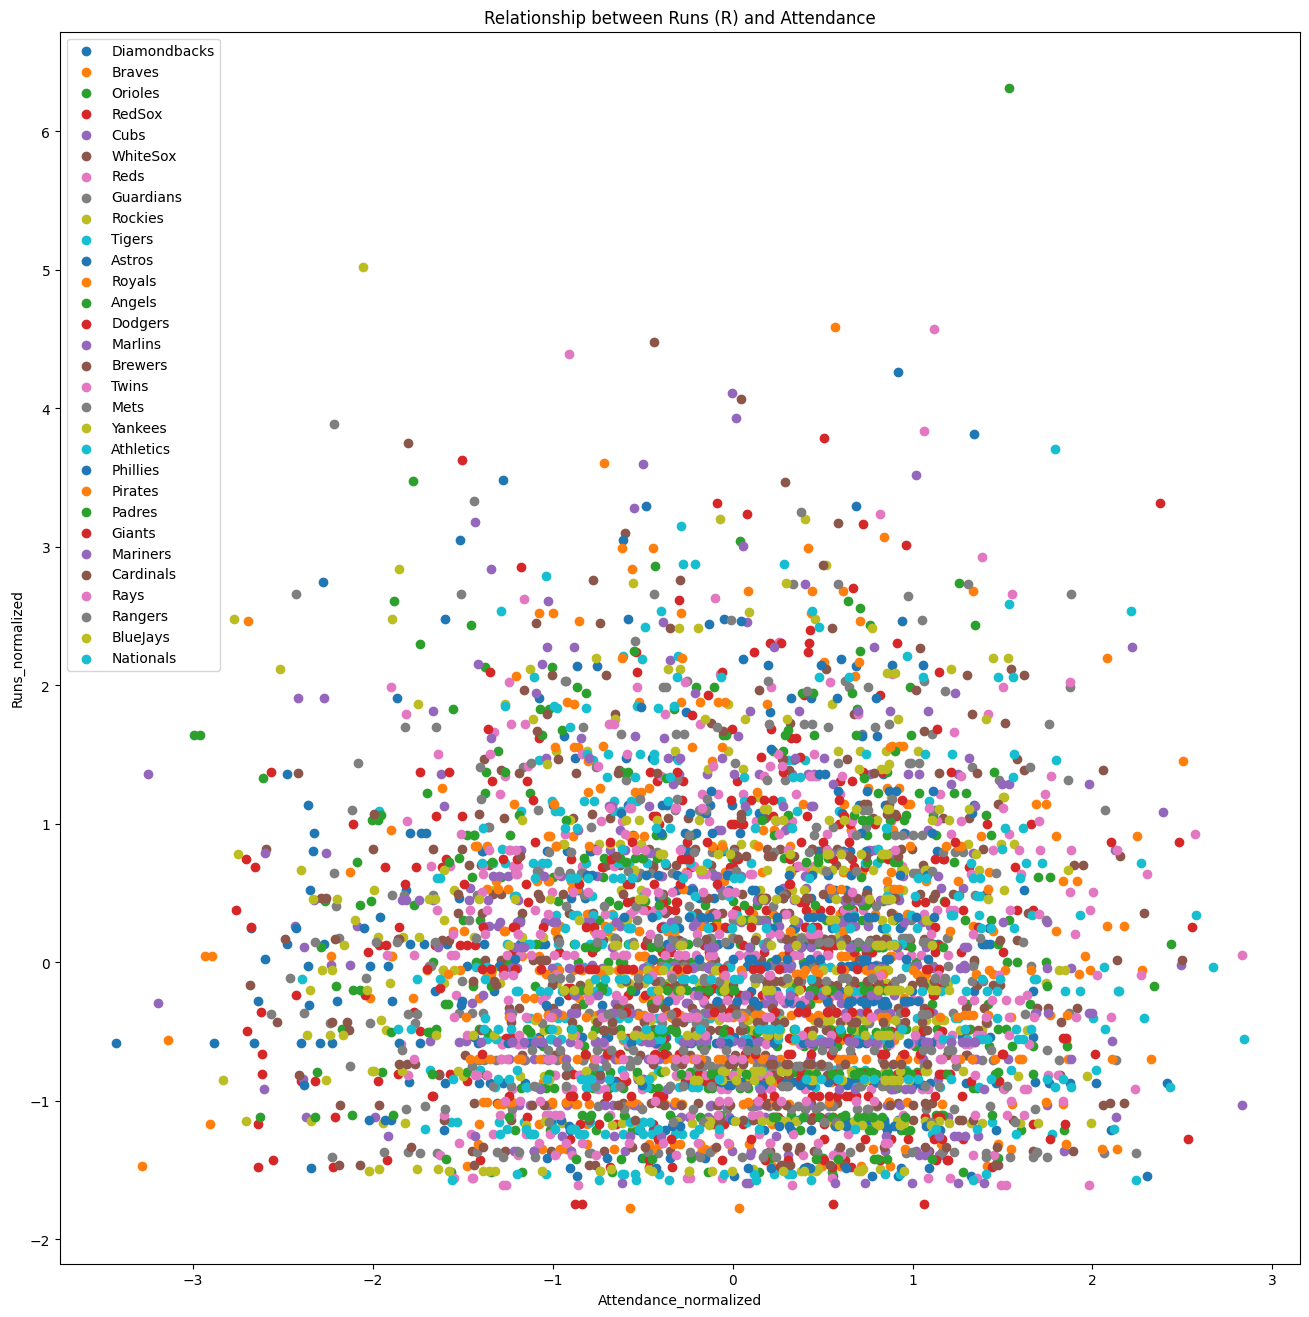

In [139]:
fig, ax = plt.subplots(figsize=(16, 16))

for abbrev, team_name in teams.items():
   ax.scatter(team_data[team_name]['Att_norm'], team_data[team_name]['R_norm'], label=team_name)

ax.set_xlabel('Attendance_normalized')
ax.set_ylabel('Runs_normalized')
ax.set_title('Relationship between Runs (R) and Attendance')
ax.legend()

plt.show()

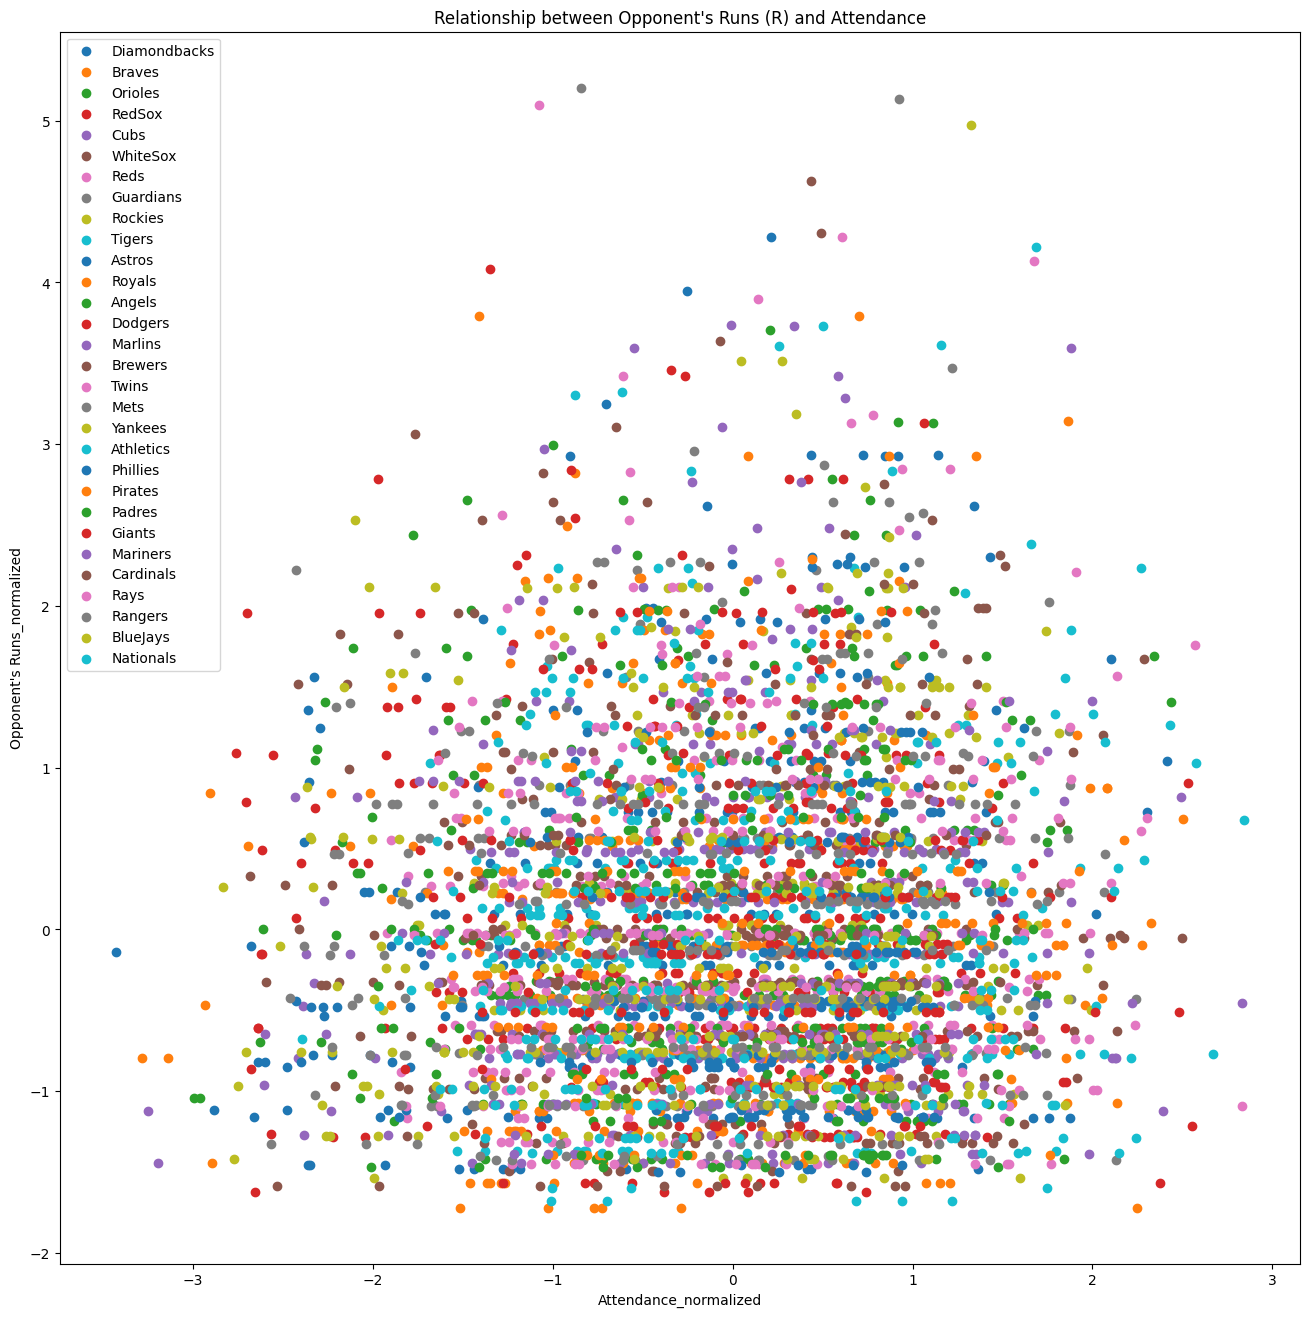

In [141]:
fig, ax = plt.subplots(figsize=(16, 16))

for abbrev, team_name in teams.items():
   ax.scatter(team_data[team_name]['Att_norm'], team_data[team_name]['RA_norm'], label=team_name)

ax.set_xlabel('Attendance_normalized')
ax.set_ylabel("Opponent's Runs_normalized")
ax.set_title("Relationship between Opponent's Runs (R) and Attendance")
ax.legend()

plt.show()

In [153]:
import pandas as pd

df_list = []

for abbrev, team_name in teams.items():
    team_df = team_data[team_name][['Att_norm', 'R_norm', 'RA_norm']].copy()
    team_df['Team'] = team_name
    df_list.append(team_df)

full_df = pd.concat(df_list)

correlation_attendance_r = full_df['Att_norm'].corr(full_df['R_norm'])
correlation_attendance_ra = full_df['Att_norm'].corr(full_df['RA_norm'])

print(f"The correlation coefficient between Attendance and R is: {correlation_attendance_r}")
print(f"The correlation coefficient between Attendance and RA is: {correlation_attendance_ra}")

The correlation coefficient between Attendance and R is: -0.0234815328490759
The correlation coefficient between Attendance and RA is: 0.04456261144304605


In [145]:
team = {}

for abbrev, team_name in teams.items():
    home_data = (team_data[team_name]['Home_Away'] == 'Home')
    team[team_name] = team_data[team_name][home_data]

    team[team_name].loc[:, 'W/L'] = team_data[team_name].loc[home_data, 'W/L'].replace('W-wo', 'W')

    selected_columns = ['Home_Away', 'W/L', 'R', 'RA', 'Attendance']
    team[team_name] = team[team_name].loc[:, selected_columns]

In [146]:
team['RedSox']

,Home_Away,W/L,R,RA,Attendance
1,Home,L,9.0,10.0,36049.0
2,Home,W,9.0,8.0,29062.0
3,Home,W,9.0,5.0,27886.0
4,Home,L,6.0,7.0,28369.0
5,Home,L,1.0,4.0,28842.0
...,...,...,...,...,...
154,Home,W,3.0,2.0,37102.0
155,Home,L,0.0,1.0,33392.0
156,Home,L,2.0,3.0,33399.0
157,Home,L,7.0,9.0,34094.0


In [147]:
decimal_places = 2
avg = []

for team_name, data in team.items():
    avg_attendance_w = round(team[team_name][team[team_name]['W/L'] == 'W']['Attendance'].mean(), decimal_places)
    avg_attendance_l = round(team[team_name][team[team_name]['W/L'] == 'L']['Attendance'].mean(), decimal_places)
    avg_attendance = round(team[team_name]['Attendance'].mean(), decimal_places)

    w_count = team[team_name][team[team_name]['W/L'] == 'W'].shape[0]
    l_count = team[team_name][team[team_name]['W/L'] == 'L'].shape[0]

    avg.append({
        'Team': team_name,
        'Avg_Attendance_W': avg_attendance_w,
        'Avg_Attendance_L': avg_attendance_l,
        'Avg_Attendance': avg_attendance,
        'Avg_Att_modified': round((avg_attendance_w - avg_attendance_l) / avg_attendance, decimal_places+5),
        'Wins': w_count,
        'Losses': l_count,
        'Win-rate': round((w_count / (w_count + l_count)), decimal_places+1)
    })

avg_attendance_data = pd.DataFrame(avg)

avg_attendance_data

,Team,Avg_Attendance_W,Avg_Attendance_L,Avg_Attendance,Avg_Att_modified,Wins,Losses,Win-rate
0,Diamondbacks,22579.91,26059.11,24212.12,-0.143697,43,38,0.531
1,Braves,39243.87,39683.59,39401.30,-0.011160,52,29,0.642
2,Orioles,23438.31,24635.03,23911.09,-0.050049,49,32,0.605
3,RedSox,32952.38,33023.50,32989.26,-0.002156,39,42,0.481
4,Cubs,34312.58,34196.75,34261.10,0.003381,45,36,0.556
5,WhiteSox,21770.63,21177.27,21405.49,0.027720,31,50,0.383
6,Reds,22045.58,27920.23,25164.22,-0.233453,38,43,0.469
7,Guardians,23680.55,23319.03,23513.69,0.015375,42,39,0.519
8,Rockies,33225.65,31331.50,32196.73,0.058831,37,44,0.457
9,Tigers,20250.34,21526.52,20946.44,-0.060926,37,44,0.457


In [150]:
avg_attendance_data['Higher_Attendance'] = np.where(avg_attendance_data['Avg_Attendance_W'] > avg_attendance_data['Avg_Attendance_L'], 'W', 'L')
win_loss_counts = avg_attendance_data['Higher_Attendance'].value_counts()

w_count = win_loss_counts.get('W')
l_count = win_loss_counts.get('L')

print('W Count:', w_count)
print('L Count:', l_count)

w_teams = avg_attendance_data[avg_attendance_data['Higher_Attendance'] == 'W']['Team']
w_teams

W Count: 11
L Count: 19


4          Cubs
5      WhiteSox
7     Guardians
8       Rockies
14      Marlins
15      Brewers
16        Twins
18      Yankees
19    Athletics
24     Mariners
27      Rangers
Name: Team, dtype: object

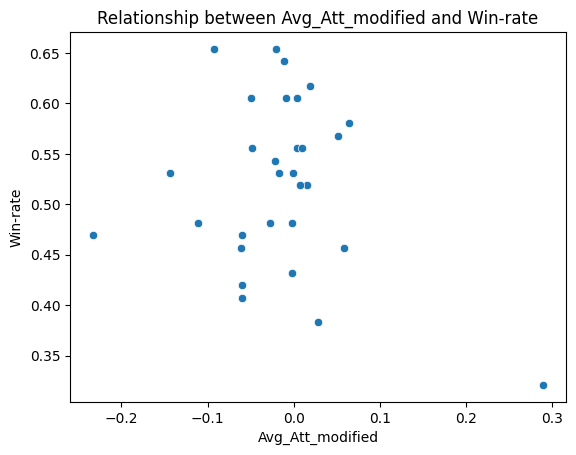

In [148]:
import seaborn as sns

sns.scatterplot(x='Avg_Att_modified', y='Win-rate', data=avg_attendance_data)
plt.title('Relationship between Avg_Att_modified and Win-rate')
plt.show()

The correlation coefficient is: -0.21867330685086372


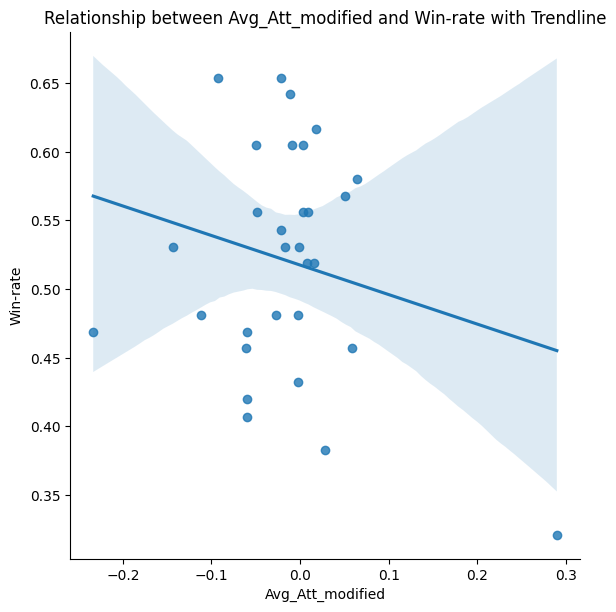

In [149]:
x = avg_attendance_data['Avg_Att_modified']
y = avg_attendance_data['Win-rate']

sns.lmplot(x='Avg_Att_modified', y='Win-rate', data=avg_attendance_data, height=6, aspect=1)
plt.title('Relationship between Avg_Att_modified and Win-rate with Trendline')

correlation = np.corrcoef(x, y)[0, 1]
print(f"The correlation coefficient is: {correlation}")

plt.show()